# VISUALIZACIÓN DE RESULTADOS

# Carga de las bibliotecas y los datos

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from IPython.display import Image, display
import plotly.io as pio


In [14]:
df = pd.read_csv("../Data/escalados.csv", sep=',', index_col='CUST_ID')
labels = pd.read_csv("../Data/scaled_PCA_labels.csv", sep=',', index_col='CUST_ID')

# Visualización de los clusters con spider plots

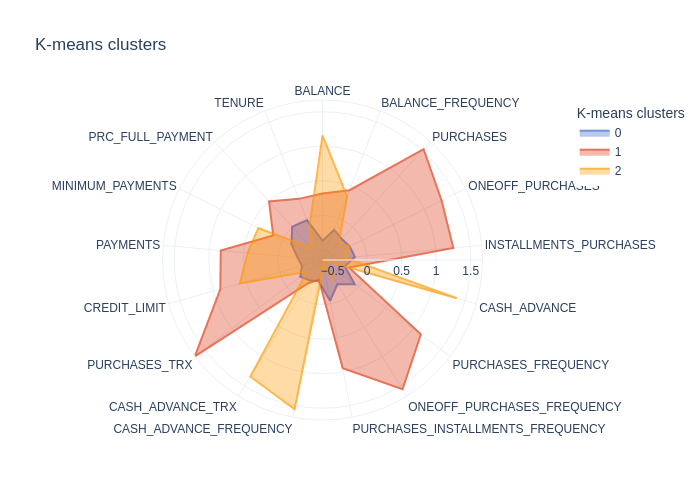

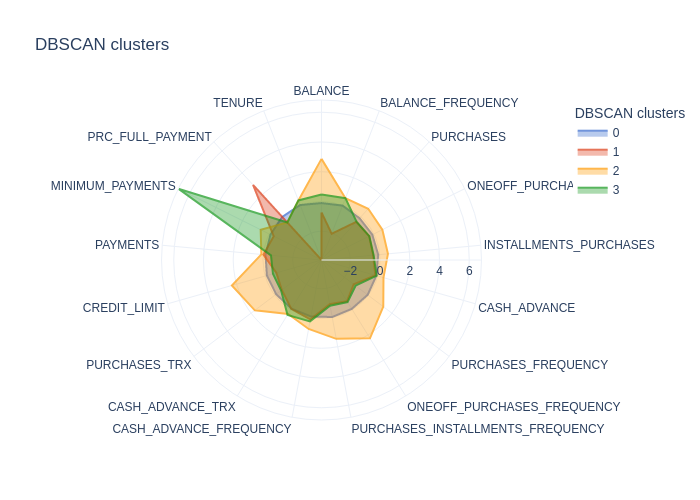

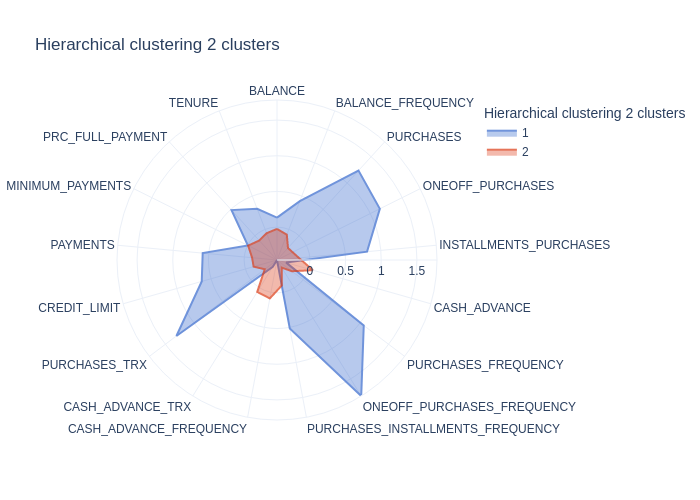

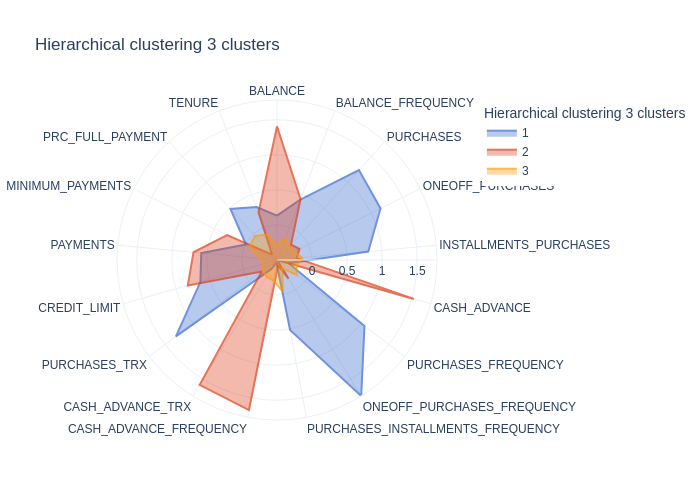

In [15]:


def plot_spider_by_method_plotly(df, labels_df):
    methods = labels_df.columns
    
    for method in methods:
        data_by_cluster = df.groupby(labels_df[method]).mean()
        melted_data = (
            data_by_cluster.reset_index()
            .melt(id_vars=labels_df[method].name, var_name='Feature', value_name='Value'))
        melted_data = melted_data[melted_data[labels_df[method].name] != -1]
        
        fig = px.line_polar(
            melted_data,
            r="Value",
            theta="Feature",
            color=labels_df[method].name,
            line_close=True,
            color_discrete_sequence=px.colors.qualitative.G10,
            title=method,
            template="plotly_white")
        
        fig.update_traces(fill='toself', opacity=0.7)
        filename = f"spiderplot_{method}.png"
        pio.write_image(fig, filename)
        display(Image(filename))

plot_spider_by_method_plotly(df, labels)


# Comparación de algoritmos


**K-means:** Produjo tres clusters bien definidos con un coeficiente de silueta de 0.26, siendo una opción robusta para identificar grupos de clientes.

**DBSCAN:** Identificó cuatro clusters, aunque con mayor solapamiento y menor calidad en la segmentación (coeficiente de silueta de 0.19).

**Clustering jerárquico:** Obtuvo el mayor coeficiente de silueta (0.27) con dos clusters, mientras que al dividirse en tres clusters los resultados fueron muy similares a los obtenidos con K-means.

# Clusters identificados

K-means y el clustering jerárquico para tres clusters produjeron tres segmentos de clientes muy similares:

**Clientes promedio:** Con comportamiento cercano a la media, sin características extremas.

**Clientes VIP:** Con alta frecuencia de compras y un gasto elevado, posiblemente un grupo objetivo para promociones premium.

**Clientes crediticios:** Caracterizados por el uso frecuente de avances en efectivo, pagos mínimos recurrentes y límites de crédito altos, un perfil que podría requerir estrategias para mitigar el riesgo crediticio.

# Recomendaciones y perspectivas

La elección entre usar dos o tres clusters dependerá de las necesidades específicas del negocio. Por ejemplo, si el objetivo es identificar riesgos crediticios, el cluster "deudor" es clave; mientras que para maximizar ingresos, el cluster "derrochador" es el foco principal.

Los coeficientes de silueta obtenidos son moderados, lo que indica que los clusters podrían no estar perfectamente separados. Esto podría mejorarse con más variables o técnicas avanzadas de preprocesamiento.

Incorporar variables socioeconómicas permitiría un análisis más profundo.